## Diabetes Prediction Dataset

Dataset ini disusun untuk mendukung pengembangan sistem prediksi diabetes berdasarkan data gaya hidup dan kondisi kesehatan pengguna. Dataset ini cocok digunakan dalam studi klasifikasi, analisis kesehatan, serta pengembangan model prediktif berbasis machine learning. Seluruh data dikumpulkan melalui survei dan merepresentasikan berbagai variabel terkait risiko diabetes.

## Fitur Dataset

| Nama Fitur         | Deskripsi                                               |
|--------------------|---------------------------------------------------------|
| **Gender**         | Jenis kelamin responden (Male atau Female).             |
| **Age**            | Usia responden dalam tahun.                              |
| **Hypertension**   | Status hipertensi (1 = ya, 0 = tidak).                   |
| **Heart Disease**  | Status penyakit jantung (1 = ya, 0 = tidak).             |
| **Smoking History**| Riwayat merokok responden, seperti never, former, current. |
| **BMI**            | Indeks massa tubuh.                                      |
| **HbA1c Level**    | Rata-rata kadar glukosa darah selama 2–3 bulan terakhir. |
| **Blood Glucose Level** | Tingkat glukosa darah saat ini.                      |
| **Diabetes**       | Target klasifikasi: apakah responden terindikasi diabetes (Yes atau No). |

## Sumber Dataset

Dataset ini diperoleh dari Kaggle:  
🔗 [Diabetes Prediction Dataset – Kaggle](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset)


## IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## LOAD DATA

In [4]:
# Load dataset dari path
file_path = 'https://raw.githubusercontent.com/SweetAware/sweetaware-model/refs/heads/main/diabetes_prediction_dataset.csv'
df = pd.read_csv(file_path)

# Tampilkan 5 baris
df.head(7)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1


## EXPLORATORY DATA ANALYISIS

### Dataset Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
# Jumlah baris (data) dan kolom
rows, cols = df.shape
print(f"Jumlah data (baris): {rows}")
print(f"Jumlah fitur (kolom): {cols}")

Jumlah data (baris): 100000
Jumlah fitur (kolom): 9


In [8]:
print("Missing values:\n", df.isnull().sum().loc[lambda x: x > 0])
print("\nDuplikat:", df.duplicated().sum())

Missing values:
 Series([], dtype: int64)

Duplikat: 3854


### Univariate Analysis

In [9]:
# split feature
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
categorical_features = ['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes']

In [10]:
categorical_summary = []

for col in categorical_features:
    counts = df[col].value_counts(dropna=False)
    percentages = df[col].value_counts(normalize=True, dropna=False) * 100

    temp_df = pd.DataFrame({
        'feature': col,
        'category': counts.index.astype(str),  # Pastikan tetap string
        'count': counts.values,
        'percentage': percentages.round(2).values
    })

    categorical_summary.append(temp_df)

categorical_summary_df = pd.concat(categorical_summary, ignore_index=True)

print("\nUnivariate Analysis - Categorical Features")
print(categorical_summary_df)



Univariate Analysis - Categorical Features
            feature     category  count  percentage
0            gender       Female  58552       58.55
1            gender         Male  41430       41.43
2            gender        Other     18        0.02
3      hypertension            0  92515       92.52
4      hypertension            1   7485        7.48
5     heart_disease            0  96058       96.06
6     heart_disease            1   3942        3.94
7   smoking_history      No Info  35816       35.82
8   smoking_history        never  35095       35.10
9   smoking_history       former   9352        9.35
10  smoking_history      current   9286        9.29
11  smoking_history  not current   6447        6.45
12  smoking_history         ever   4004        4.00
13         diabetes            0  91500       91.50
14         diabetes            1   8500        8.50


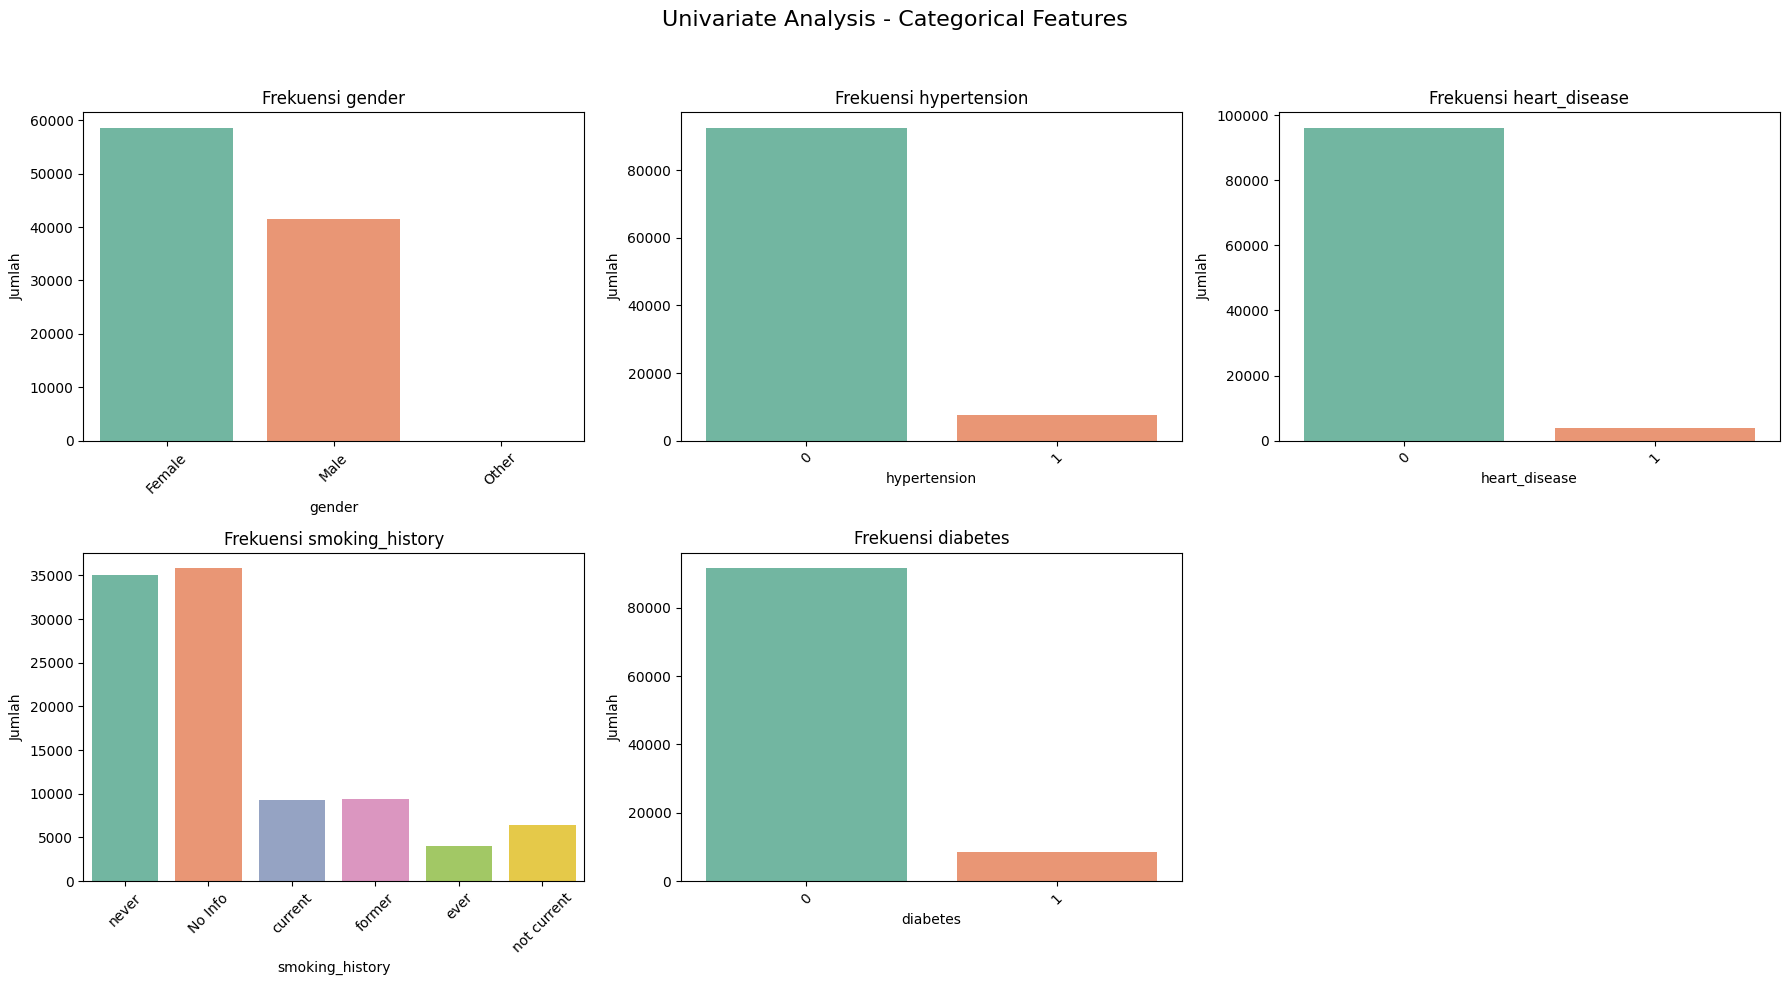

In [11]:
plt.figure(figsize=(18, 10))

# Buat subplot untuk masing-masing fitur kategorikal
for i, col in enumerate(categorical_features):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=df, x=col, hue=col, palette='Set2', legend=False)  # tambahkan hue=col & legend=False
    plt.title(f'Frekuensi {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)

plt.suptitle('Univariate Analysis - Categorical Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


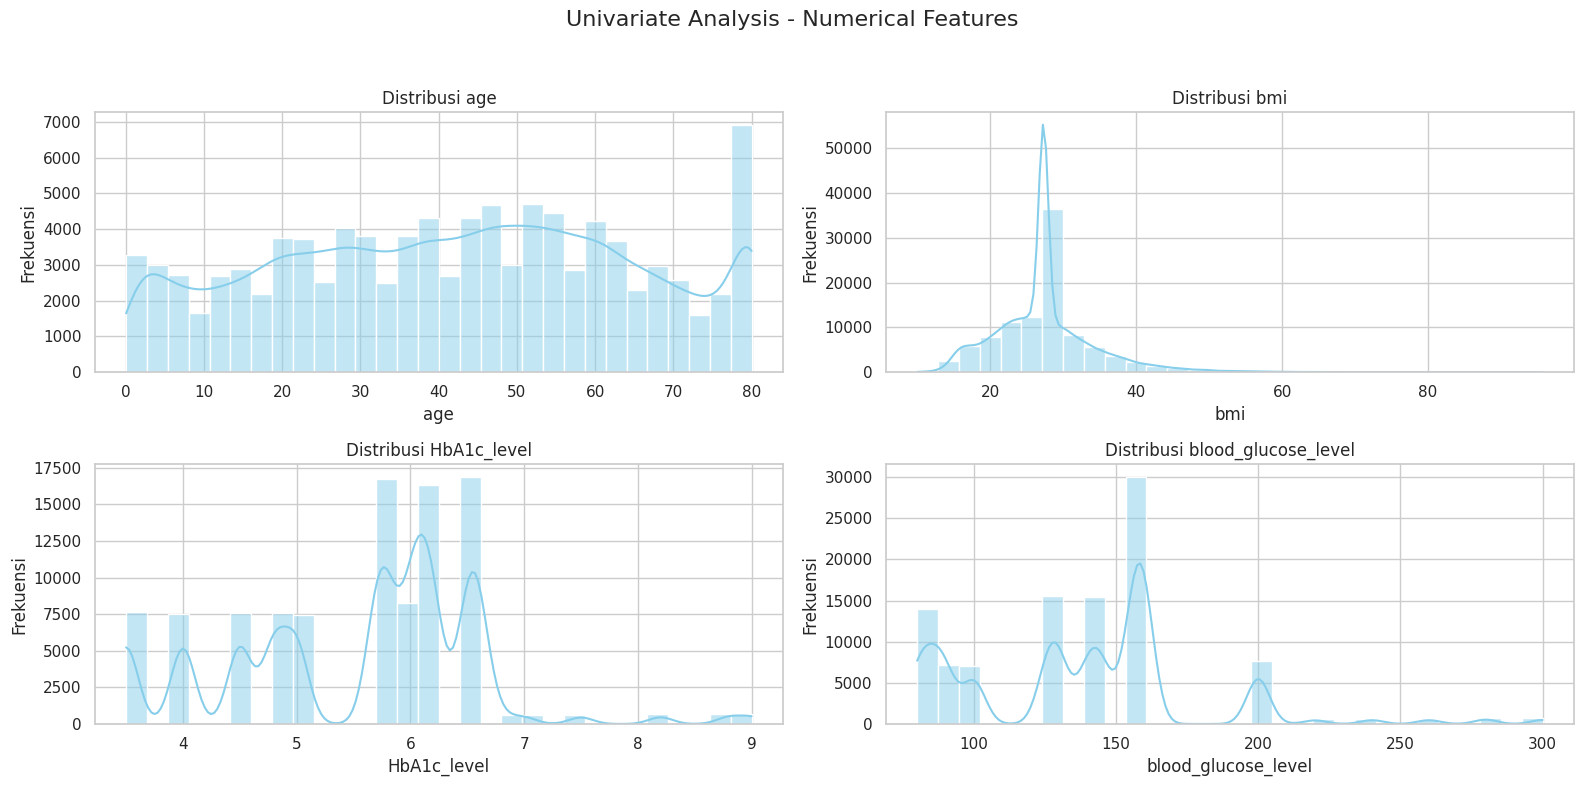

In [12]:
# Set gaya visual
sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))

# Buat subplot untuk masing-masing fitur numerik
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

plt.suptitle('Univariate Analysis - Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Multivariate Analysis

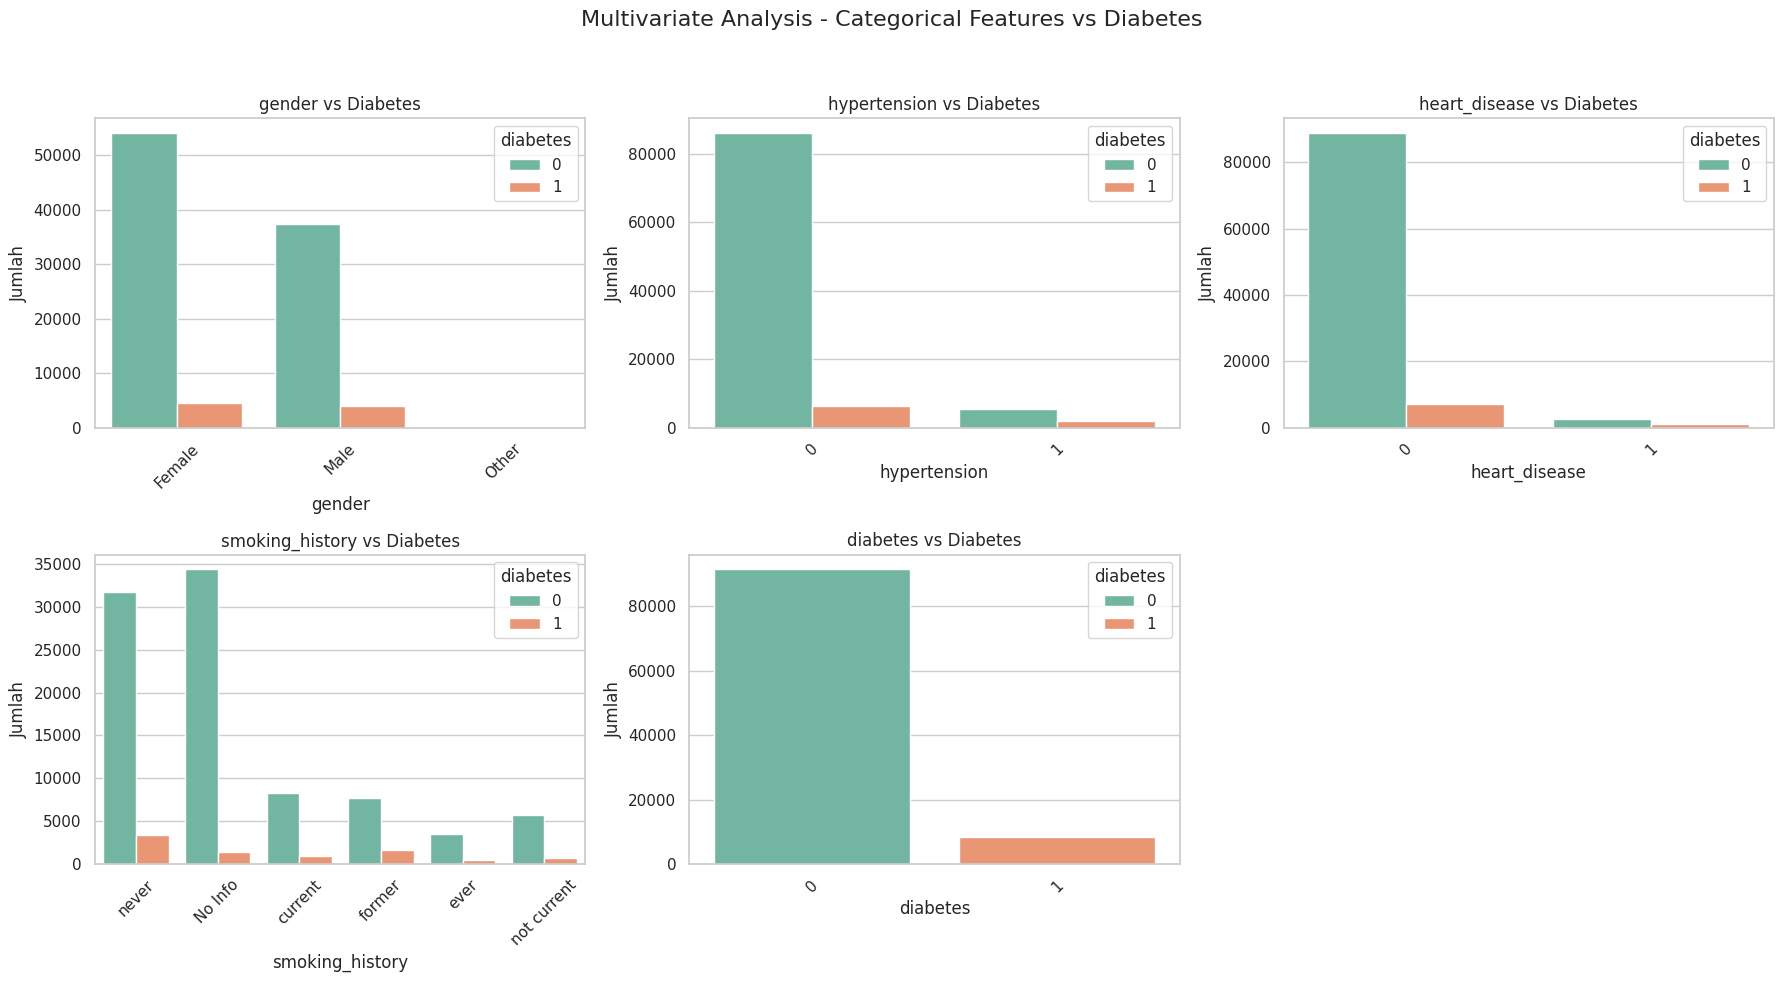

In [13]:
plt.figure(figsize=(18, 10))

for i, col in enumerate(categorical_features):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=df, x=col, hue='diabetes', palette='Set2')
    plt.title(f'{col} vs Diabetes')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)

plt.suptitle('Multivariate Analysis - Categorical Features vs Diabetes', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


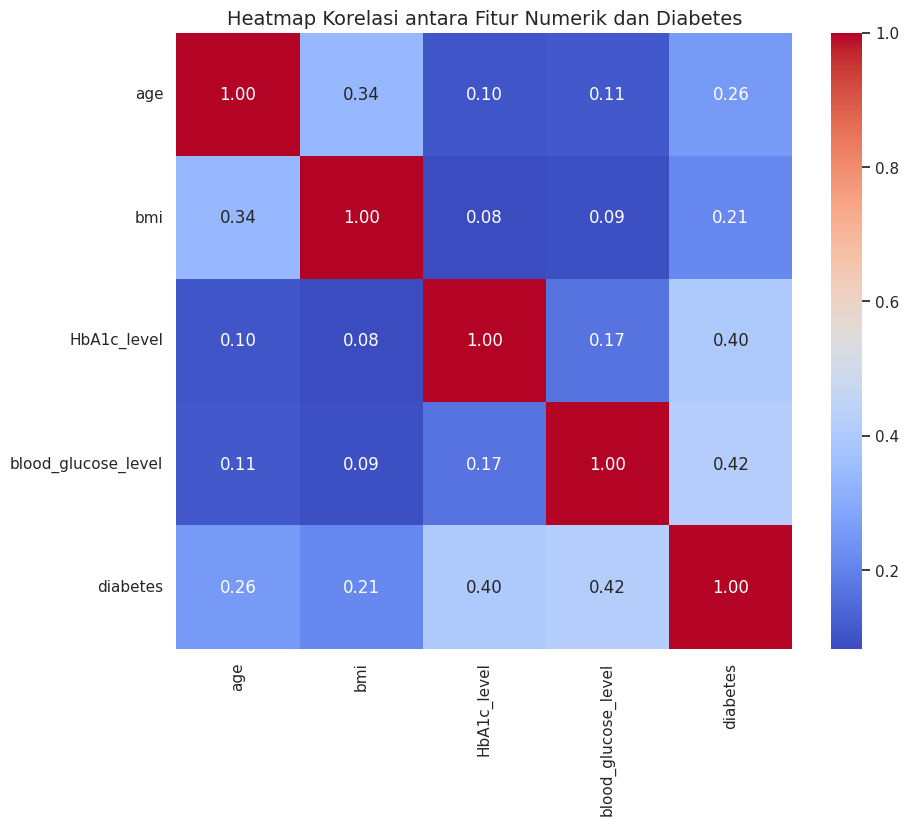

In [14]:
# Jika 'diabetes' masih bertipe object, ubah ke numerik
df_corr = df.copy()
if df_corr['diabetes'].dtype == 'object':
    df_corr['diabetes'] = df_corr['diabetes'].map({'Yes': 1, 'No': 0})

# Hitung korelasi
plt.figure(figsize=(10, 8))
correlation = df_corr[numerical_features + ['diabetes']].corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Heatmap Korelasi antara Fitur Numerik dan Diabetes", fontsize=14)
plt.show()


## PREPROCESSING

### Tangani Duplikasi

In [15]:
# Hapus duplikasi
df = df.drop_duplicates()

# Cek jumlah data duplikat yang tersisa
duplicates_remaining = df.duplicated().sum()
print(f"Jumlah data duplikat setelah penghapusan: {duplicates_remaining}")

Jumlah data duplikat setelah penghapusan: 0


### Encode Categorical

In [16]:
from sklearn.preprocessing import LabelEncoder

# Otomatis encode semua kolom kategorikal
categorical_cols = df.select_dtypes(include='object').columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # simpan encoder jika perlu inverse_transform

In [17]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

## SPLIT DATA

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## MODELLING & EVALUASI

In [20]:
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Karena ini binary classification
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

# Buat callback EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,           # Berhenti jika tidak ada perbaikan selama 5 epoch
    restore_best_weights=True
)

# Latih model dengan callback
model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],  # Tambahkan di sini
    verbose=1
)

Epoch 1/100
1923/1923 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.9228 - loss: 0.2143 - val_accuracy: 0.9599 - val_loss: 0.1181
Epoch 2/100
1923/1923 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9580 - loss: 0.1206 - val_accuracy: 0.9617 - val_loss: 0.1127
Epoch 3/100
1923/1923 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9619 - loss: 0.1137 - val_accuracy: 0.9643 - val_loss: 0.1082
Epoch 4/100
1923/1923 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9644 - loss: 0.1068 - val_accuracy: 0.9650 - val_loss: 0.1058
Epoch 5/100
1923/1923 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9639 - loss: 0.1072 - val_accuracy: 0.9661 - val_loss: 0.1021
Epoch 6/100
1923/1923 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9645 - loss: 0.1063 - val_accuracy: 0.9655 - val_loss: 0.1000
Epoch 7/100
1923/1923 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9658 - loss: 0.1023 - val_accuracy: 0.9641 - val_loss: 0.0987
Epoch 8/100
1923/1923 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9644 - loss: 

In [23]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Akurasi pada data test: {accuracy:.2f}")

601/601 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9710 - loss: 0.0836
Akurasi pada data test: 0.97


601/601 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


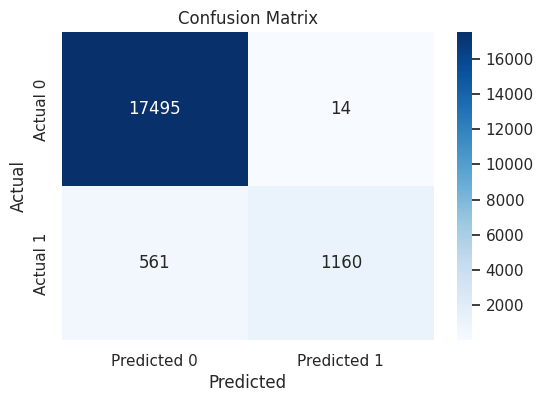

Evaluation Metrics:
Accuracy : 0.9701
Precision: 0.9881
Recall   : 0.6740
F1-Score : 0.8014
AUC-ROC  : 0.9761


In [24]:
# Prediksi probabilitas kelas positif
y_pred_prob = model.predict(X_test).flatten()  # pastikan bentuknya 1D

# Ubah probabilitas ke kelas 0 atau 1 dengan threshold 0.5
y_pred = (y_pred_prob > 0.5).astype(int)

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Tampilkan confusion matrix dengan heatmap seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Hitung metrik satu per satu
accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)
auc       = roc_auc_score(y_test, y_pred_prob)

# Cetak metrik secara eksplisit
print("Evaluation Metrics:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")
print(f"AUC-ROC  : {auc:.4f}")

## Convert Model

### Simpan ke h5

In [25]:
model.save("model.h5")

### Convert ke TensorFlow.js

In [26]:
!pip install tensorflowjs
!tensorflowjs_converter --input_format=keras model.h5 tfjs_model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 25.0
    Uninstalling packaging-25.0:
      Successfully uninstalled packaging-25.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.38.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
xarray 2025.12.0 requires packaging>=24.1, but you have packaging 23.2 which is incompatible.
db-dtypes 1.4.4 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


2025-12-12 00:37:18.162764: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765499838.194508    3979 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765499838.204289    3979 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1765499838.228188    3979 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1765499838.228220    3979 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1765499838.228229    3979 computation_placer.cc:177] computation placer alr

### Saved Model Format

In [27]:
# Save model in SavedModel format
saved_model_dir = 'saved_model'
os.makedirs(saved_model_dir, exist_ok=True)
model.export(saved_model_dir)
print("Model successfully saved in SavedModel format.")

Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 8), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  137120551205392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137120551206544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137120550028304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137120550029456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137120551205776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137120550027920: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model successfully saved in SavedModel format.


### Convert ke TF Lite

In [28]:
# Konversi ke TFLite
converter = tf.lite.TFLiteConverter.from_saved_model("saved_model")
converter.experimental_new_converter = True  # Enable the new MLIR-based converter if available.
converter.target_spec.supported_ops = [
  tf.lite.OpsSet.TFLITE_BUILTINS, # enable TensorFlow Lite ops.
  tf.lite.OpsSet.SELECT_TF_OPS # enable TensorFlow ops.
]
tflite_model = converter.convert()

# Simpan model.tflite
os.makedirs("tflite", exist_ok=True)
with open("tflite/model.tflite", "wb") as f:
    f.write(tflite_model)

# Simpan label.txt jika ada label
labels = ["Plastic Bag Images", "Paper Bag Images", "Garbage Bag Images"]
with open("tflite/label.txt", "w") as f:
    for label in labels:
        f.write(label + "\n")


In [29]:
!zip -r all_converted_model.zip saved_model tfjs_model tflite

  adding: saved_model/ (stored 0%)
  adding: saved_model/fingerprint.pb (stored 0%)
  adding: saved_model/assets/ (stored 0%)
  adding: saved_model/variables/ (stored 0%)
  adding: saved_model/variables/variables.data-00000-of-00001 (deflated 58%)
  adding: saved_model/variables/variables.index (deflated 60%)
  adding: saved_model/saved_model.pb (deflated 84%)
  adding: tfjs_model/ (stored 0%)
  adding: tfjs_model/group1-shard1of1.bin (deflated 1%)
  adding: tfjs_model/model.json (deflated 77%)
  adding: tflite/ (stored 0%)
  adding: tflite/label.txt (deflated 36%)
  adding: tflite/model.tflite (deflated 36%)


## INFERENCE

In [30]:
gender = input("Gender (Male/Female): ")
age = int(input("Umur: "))
hypertension = int(input("Hipertensi (0 = Tidak, 1 = Ya): "))
heart_disease = int(input("Penyakit jantung (0 = Tidak, 1 = Ya): "))
smoking_history = input("Riwayat merokok (never/former/current): ")
bmi = float(input("BMI: "))
hba1c = float(input("HbA1c Level: "))
glucose = float(input("Blood Glucose Level: "))

sample = pd.DataFrame([{
    'gender': label_encoders['gender'].transform([gender])[0],
    'age': age,
    'hypertension': hypertension,
    'heart_disease': heart_disease,
    'smoking_history': label_encoders['smoking_history'].transform([smoking_history])[0],
    'bmi': bmi,
    'HbA1c_level': hba1c,
    'blood_glucose_level': glucose
}])

sample_scaled = scaler.transform(sample)
pred = model.predict(sample_scaled)[0][0]

# Kategorisasi risiko berdasarkan probabilitas
if pred < 0.3:
    risk_category = "Low Risk"
    risk_color = "🟢"
elif pred < 0.7:
    risk_category = "Moderate Risk"
    risk_color = "🟡"
else:
    risk_category = "High Risk"
    risk_color = "🔴"

print(f"\nProbabilitas diabetes: {pred * 100:.2f}%")
print(f"Kategori Risiko: {risk_color} {risk_category}")

Gender (Male/Female): Male
Umur: 24
Hipertensi (0 = Tidak, 1 = Ya): 1
Penyakit jantung (0 = Tidak, 1 = Ya): 0
Riwayat merokok (never/former/current): former
BMI: 27
HbA1c Level: 7.2
Blood Glucose Level: 210
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step

Probabilitas diabetes: 99.75%
Kategori Risiko: 🔴 High Risk
